In [2]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *


In [3]:
models = [ DirThompsonSampling.load(f"data/dir_ts/Simple-every-{i}.pkl.gz") for i in range(3)]

In [4]:
mean_rewards = []
for i in range(3):
    mean_rewards.append(models[i].get_mean_rewards(10000))
        

In [5]:
dqn_mean_rewards = {}
random_rewards = {}
random_reward = np.mean([evaluate_policy(random_policy(), 10) for _ in range(1000)])
for key in models[0].policies.keys():
    try:
        dqn = Training.load(f"data/trainings/DQN-{key}_object.pkl")
    except:
        dqn = train_dqn(true_env, key, key)
    dqn_mean_rewards[key] = dqn.evaluate_policy(10000)
    random_rewards[key] = random_reward

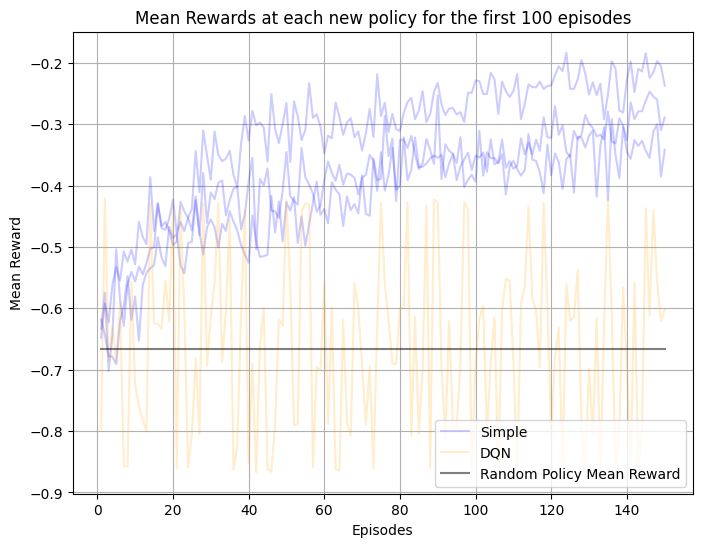

In [6]:
plt.figure(figsize=(8, 6))

plt.plot(list(models[0].policies.keys()), mean_rewards[0], color='blue', alpha=0.2, label="Simple")
for i in range(1,3):
    plt.plot(list(models[i].policies.keys()), mean_rewards[i], color='blue', alpha=0.2)
        
plt.plot(list(dqn_mean_rewards.keys()), list(dqn_mean_rewards.values()), color='orange', alpha=0.2, label="DQN")
plt.plot(list(dqn_mean_rewards.keys()), list(random_rewards.values()), color='black', alpha=0.5, label="Random Policy Mean Reward")

# Add labels, title, and legend
plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.title('Mean Rewards at each new policy for the first 100 episodes')
# plt.xscale('log', base=2)
# plt.xscale('log', base=10)
plt.legend(loc='lower right')
# plt.ylim(-0.75, -0.05)
plt.grid(True)

# Show the plot
plt.show()